In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import joblib


In [28]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/processed/undersampled_data.csv')

# Identify columns with string values
string_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical variables
label_encoder = LabelEncoder()
for col in string_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [29]:
# # Separate fraud and non-fraud data
# fraud_data = df[df['fraud_bool'] == 1]
# non_fraud_data = df[df['fraud_bool'] == 0]

# # Undersample non-fraud data to match the size of the fraud data
# undersampled_non_fraud_data = resample(non_fraud_data, replace=False, n_samples=len(fraud_data), random_state=42)

# # Combine fraud and undersampled non-fraud data
# df = pd.concat([fraud_data, undersampled_non_fraud_data])

# Split the combined data into features (X) and target labels (y)
X = df.drop('fraud_bool', axis=1)
y = df['fraud_bool']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

bm_pred = baseline_model.predict(X_test)
bm_roc_auc = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:,1])
fpr_bm, tpr_bm, thresholds_bm = roc_curve(y_test, baseline_model.predict_proba(X_test)[:,1])

# Evaluate the performance of the baseline_mode
accuracy = accuracy_score(y_test, bm_pred)
report = classification_report(y_test, bm_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Save the trained model to a file
joblib.dump(baseline_model, '../data/model/baseline_model.pkl')
# Load the saved model from file
# loaded_model = joblib.load('baseline_model.pkl')


Accuracy: 0.8398514476277096
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     11018
           1       0.59      0.10      0.17      2176

    accuracy                           0.84     13194
   macro avg       0.72      0.54      0.54     13194
weighted avg       0.80      0.84      0.79     13194



/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['../data/model/baseline_model.pkl']

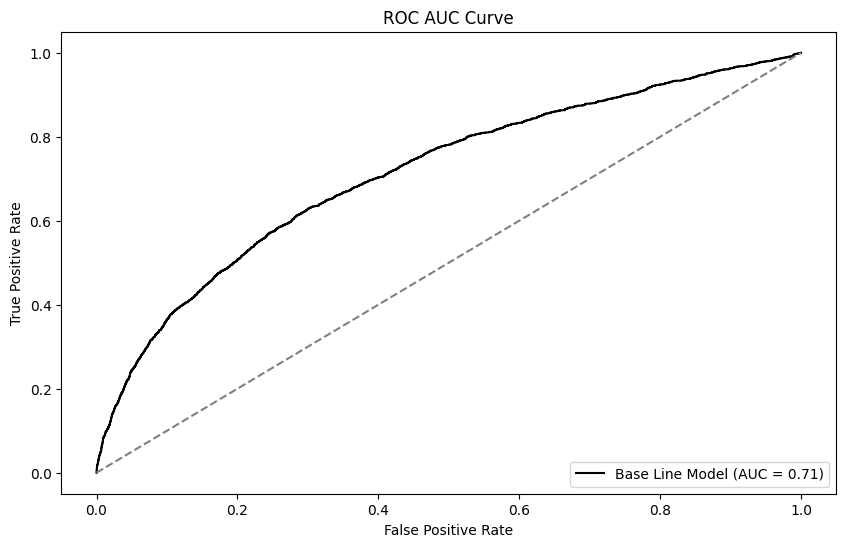

In [30]:
# Plot ROC AUC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_bm, tpr_bm, label=f'Base Line Model (AUC = {bm_roc_auc:.2f})', color='black')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()